In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import sweetviz

In [2]:
data=pd.read_csv("Salary_Data (2).csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
x=data['YearsExperience']
y=data['Salary']

# EDA

In [12]:
myreport= sweetviz.analyze([data,'Data'],target_feat='Salary')

In [13]:
myreport.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### From the sweetviz report we observe that there are no missing values in the input and the output records. The input and outputskew value is positive indicating that the data is right skewed and the kurtosis is negative indicating that it has flatter peak.



In [17]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


### The correlation between salary and YearsExperience is 0.978242 indicating that there is a strong positive correlation between these two variables.

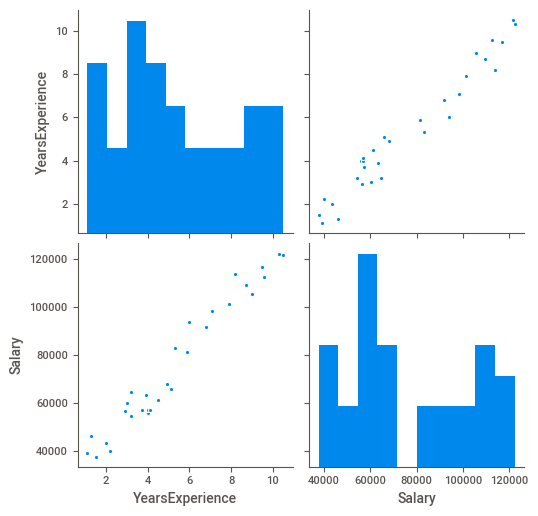

In [19]:
sns.pairplot(data)

In [20]:
model=smf.ols("y~x",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 13 Jan 2021   Prob (F-statistic):           1.14e-20
Time:                        19:01:32   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### From the above model we observe that the accuracy is 95.7% and the p value of the intercept and the coefficient is 0 which meansthat it is well with the error margin.The coefficient and the intercept is significant.

In [23]:
y_pred=model.predict(pd.DataFrame(x))

# Visualising the output and  the predicted data

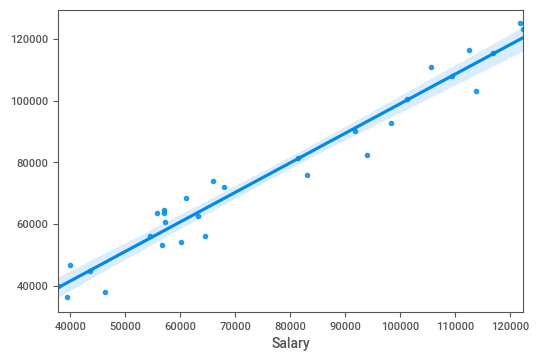

In [24]:
sns.regplot(y,y_pred)